### Analyzing The BOM Movie Gross File

# Importing
First, we imported the Pandas and Numpy libraries so we can use them to manipulate our datasets along with the Seaborn and Matplotlib library which helps create visualizations.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Next, we used Pandas to read a dataset full of information about various movies and then we displayed it.

In [30]:
df = pd.read_csv("./data/zippedData/bom.movie_gross.csv")
df
#For the top 10-15 grossing, they have that foreign gross data, we want them, then drop the rest

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Sorting
Using the sort values function, we reorganized the dataset from the movie with the highest domestic gross to the movie with the lowest domestic gross.

In [31]:
df = df.sort_values("domestic_gross", ascending = False)
df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


### Null Values
We then figured out what percentage of information about movies was missing.

In [32]:
pct_missing = np.mean(df["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))

pct_missing = np.mean(df["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

pct_missing = np.mean(df["studio"].isnull())
print('{} - {}%'.format("studio", round(pct_missing*100)))

pct_missing = np.mean(df["year"].isnull())
print('{} - {}%'.format("year", round(pct_missing*100)))

foreign_gross - 40.0%
domestic_gross - 1.0%
studio - 0.0%
year - 0.0%


40% of values were missing in the foreign gross column and 1% of values were missing in the domestic gross column. This poses a threat to the accuracy of our data. We decided to drop all of these null values, and tighten our focus on the highest grossing domestic movies (which tended to have information about foreign gross, too).

In [33]:
df = df.dropna(subset=['foreign_gross'])

In [34]:
df = df.dropna(subset=['domestic_gross'])

Then, we checked to make sure all null values were gone.

In [35]:
pct_missing = np.mean(df["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))
pct_missing = np.mean(df["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

foreign_gross - 0.0%
domestic_gross - 0.0%


In [36]:
#A great idea based off of this data would be to reccomend to Microsoft which studio to use! BV dominates the
#top 20 domestic grossing movies
#we could use the top 20 for our data or the entire dataset

#1% of domestic is still null

Out of curiousity, we checked what studio made the most movies.

In [37]:
df['studio'].value_counts().idxmax()

'Uni.'

In [38]:
#Above is the most freqently used studio

Then, we made a new dataframe from the first 50 movies in the previous dataframe sorted by highest domestic gross to represent the top 50 movies.

In [50]:
top20 = df.head(20)
top20

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


We then checked which studio made the most movies in our top 20.

In [51]:
top20['studio'].value_counts().idxmax()

'BV'

We learned BV is the studio responsible for the majority of top 20 movies.

In [41]:
#BV is the most used studio in the top 20!

In [42]:
#I could add together foreign and domestic gross

C:\Users\bisco\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


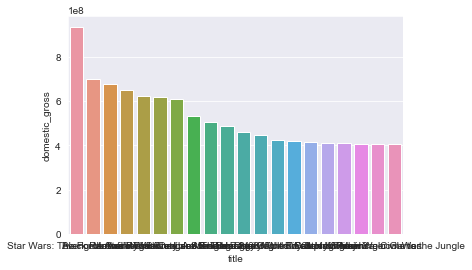

In [53]:
sns.set_style('darkgrid')

x = top20["title"]
y = top20["domestic_gross"]

plt.figure(figsize=(10, 8))
sns.barplot(x = top20["title"],
            y = top20["domestic_gross"],
            hue='studio',
            data=df_cor)
plt.ylabel("Domestic Gross", size=14)
plt.xlabel("Movie", size=14)
plt.title("", size=18)
plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.legend()

sns.barplot(x, y)
plt.show()

